In [1]:
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

# Generating synthetic data
np.random.seed(0)
data_size = 200
features = np.random.rand(data_size, 2)  # Two features: visit duration and pages visited
labels = (features[:, 0] + features[:, 1] > 1).astype(int)  # Purchase (1) or not (0)

# Convert to DataFrame for easier manipulation
df = pd.DataFrame(features, columns=['VisitDuration', 'PagesVisited'])
df['Purchase'] = labels

In [2]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(df[['VisitDuration', 'PagesVisited']], df['Purchase'], test_size=0.2, random_state=42)

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model
model = Sequential([
    Dense(10, activation='relu', input_shape=(2,)),  # Input layer with 2 features
    Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
# Train the model and save the history
history = model.fit(X_train, y_train, epochs=10, batch_size=10, validation_split=0.2)

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.5783 - loss: 0.7154 - val_accuracy: 0.5312 - val_loss: 0.7241
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5011 - loss: 0.7269 - val_accuracy: 0.5312 - val_loss: 0.7212
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6326 - loss: 0.7004 - val_accuracy: 0.5312 - val_loss: 0.7189
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5160 - loss: 0.7182 - val_accuracy: 0.5312 - val_loss: 0.7159
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4917 - loss: 0.7194 - val_accuracy: 0.5312 - val_loss: 0.7135
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5270 - loss: 0.7093 - val_accuracy: 0.5312 - val_loss: 0.7113
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5587 - loss: 0.7088 - val_accuracy: 0.5312 - val_loss: 0.7094
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4748 - loss: 0.7155 - val_accuracy: 0.5312 - val_loss

In [4]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3854 - loss: 0.7170
Test Accuracy: 0.375


Unlike decision trees, neural networks are not easily visualizable in terms of their decision-making process because they are considered "black box" models. However, there are some aspects of neural network models that you can visualize to gain insights. For the given example, we can visualize the following:

- Training Process - You can plot the training and validation loss and accuracy over epochs to understand how the model is learning.

- Decision Boundary - For a simple neural network like the one in our example (with two input features), you can visualize the decision boundary on a 2D plot.
Here's how you can implement these visualizations -

## Model Accuracy and Loss
In the context of the neural network exercise for predicting customer purchase behavior, "model accuracy" and "model loss" are two important metrics used to evaluate the performance of the model. Here's a concise explanation of each:

Model Accuracy is the fraction of predictions our model got right. In the context of the exercise, it is the proportion of correctly predicted purchase decisions (both purchases and non-purchases) out of all predictions made.
- Formula - Accuracy = (Number of Correct Predictions) / (Total Number of Predictions)
- Interpretation - a higher accuracy indicates a better performing model. For example, an accuracy of 0.90 means that 90% of the model's predictions are correct.

Model Loss measures how far the model's predictions are from the actual class labels. It is a measure of the model's error.
- Binary Cross-Entropy - is commonly used in binary classification tasks. It calculates the loss for each instance by comparing the predicted probability with the actual label (either 0 or 1), and then takes the average over all instances.
- Interpretation - lower loss values are better, indicating that the model's predictions are closer to the actual labels. A high loss value means the model's predictions are far off from the actual labels.

# Visualizing Training Process
You can modify the training code to save the history of training and then plot it:

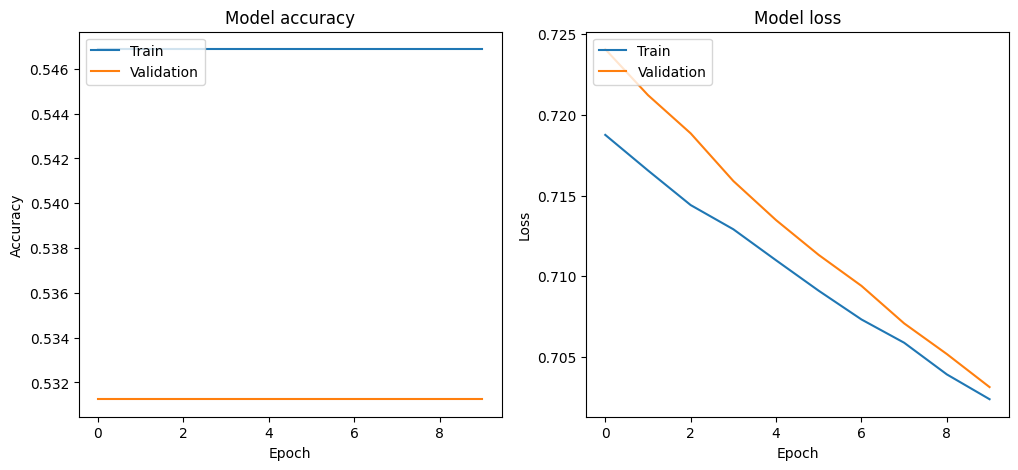

In [5]:
#Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Plotting training and validation loss and accuracy
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

# Decision Boundary
In the context of the neural network exercise for predicting customer purchase behavior, the decision boundary is a concept used to visualize how the neural network categorizes or classifies the data.

The Decision Boundary is a boundary in the feature space that separates the data points into different classes based on the predictions made by the model. In our exercise, we have two input features: website visit duration and number of pages visited. The decision boundary will be a line or curve in this 2-dimensional space that separates the points predicted to make a purchase (class 1) from those predicted not to make a purchase (class 0).

- How It's Determined - The neural network learns the decision boundary during training. It adjusts its internal parameters (weights and biases) to correctly classify the training data. The boundary is where the model's output (before applying a threshold) is at some critical value, often 0.5 for binary classification with a sigmoid output. Points on one side of the boundary are classified as one class, and points on the other side as the other class.
- Visualization - In the plot, the decision boundary is typically represented by a line or contour. Points falling on one side of the boundary are predicted to be in one class, and those on the other side in the other class. The decision boundary can be linear or non-linear depending on the complexity of the model and the nature of the data.
The decision boundary in our neural network example serves as a visual tool to understand how the model differentiates between customers likely to make a purchase and those who are not, based on their website engagement metrics.

# Creating the Visual
For a simple model with two input features, you can plot the decision boundary:

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


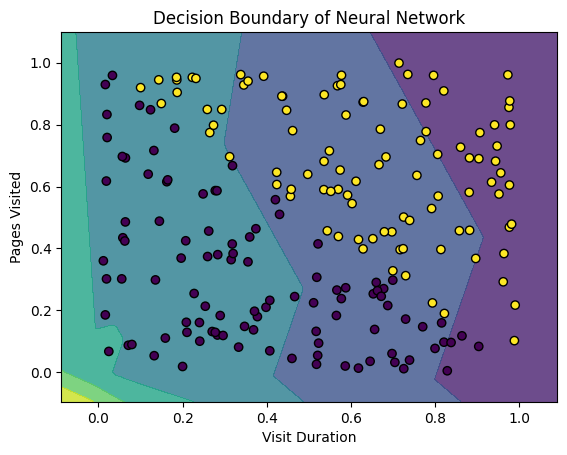

In [6]:
# Generate a grid over the feature space
x_min, x_max = df['VisitDuration'].min() - 0.1, df['VisitDuration'].max() + 0.1
y_min, y_max = df['PagesVisited'].min() - 0.1, df['PagesVisited'].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Predict over the grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the contour and training examples
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(df['VisitDuration'], df['PagesVisited'], c=df['Purchase'], edgecolor='k')
plt.xlabel('Visit Duration')
plt.ylabel('Pages Visited')
plt.title('Decision Boundary of Neural Network')
plt.show()

Remember, these visualizations are more about understanding the model's structure and learning process rather than explaining its decision-making process in detail, which is more straightforward with models like decision trees.